In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('NewspaperData.csv')
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [4]:
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [5]:
df.tail()

,Newspaper,daily,sunday
29,San Francisco Chronicle,570.364,704.322
30,St. Louis Post-Dispatch,391.286,585.681
31,St. Paul Pioneer Press,201.860,267.781
32,Tampa Tribune,321.626,408.343
33,Washington Post,838.902,1165.567


In [6]:
df.shape


(34, 3)

In [7]:

df.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [8]:
df.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [9]:
df.isna().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [11]:
df.drop("Newspaper",axis=1).corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<Axes: xlabel='daily', ylabel='Density'>

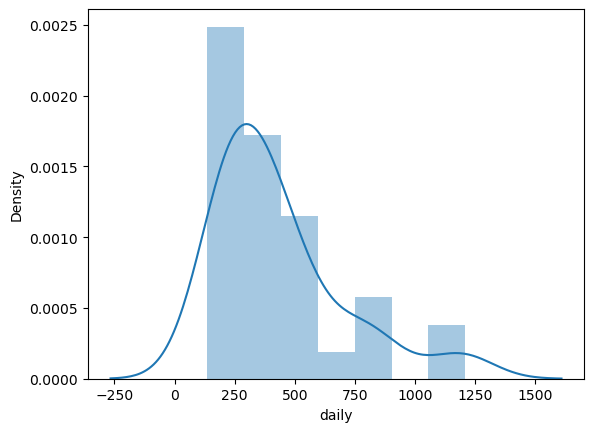

In [12]:
sns.distplot(df['daily'])#DISTPLOT-distributionplot

<Axes: xlabel='sunday', ylabel='Density'>

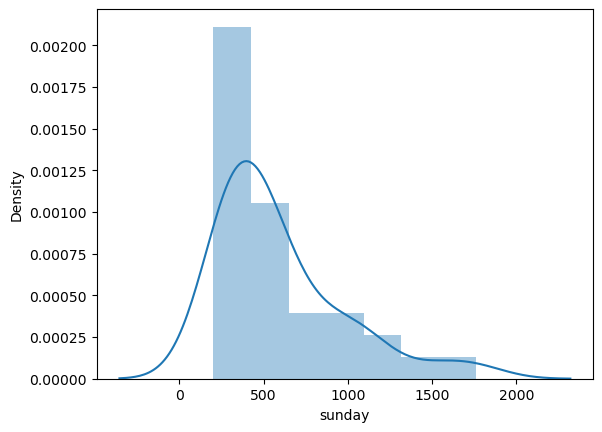

In [13]:
sns.distplot(df['sunday'])

In [14]:
df.columns

Index(['Newspaper', 'daily', 'sunday'], dtype='object')

In [15]:
import statsmodels.formula.api as smf
model=smf.ols("sunday~daily",data=df).fit()

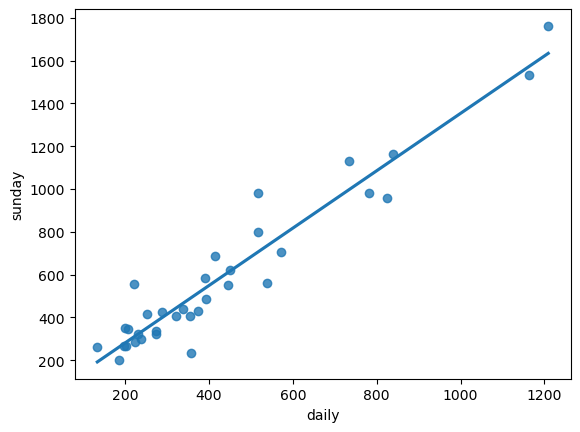

In [16]:
sns.regplot(x='daily',y='sunday',data=df,ci=None);

In [17]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [18]:
print(model.tvalues,'\n',model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [19]:
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

In [20]:
daily=300

In [21]:
sunday=1.33+daily+13.835630

In [22]:
sunday

315.16562999999996

In [23]:
print(model.tvalues,'\n',model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [31]:
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

In [35]:
import statsmodels.formula.api as smf
model=smf.ols("daily~sunday",data=df).fit()

In [37]:
#sns.regplot.

In [43]:
newdata=pd.Series([1000,3000])
newdata

0    1000
1    3000
dtype: int64

In [50]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,1000
1,3000


In [104]:
#model.predict(data_pred)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Number of rows mismatch between data argument and sunday (2 versus 1)
    daily~sunday
          ^^^^^^

In [106]:
#data_pred['sunday']=model.predict(data_pred)
#data_pred

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Number of rows mismatch between data argument and sunday (2 versus 1)
    daily~sunday
          ^^^^^^

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import warnings
warnings

<module 'warnings' from '/Applications/anaconda3/lib/python3.12/warnings.py'>

In [110]:
df=pd.read_csv('Cars.csv')
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [112]:
df.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [114]:
df.shape

(81, 5)

In [116]:
df.isna()

,HP,MPG,VOL,SP,WT
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
76,False,False,False,False,False
77,False,False,False,False,False
78,False,False,False,False,False
79,False,False,False,False,False


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [120]:
df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [122]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [124]:
df.tail(6)

,HP,MPG,VOL,SP,WT
75,175,18.762837,129,132.864163,42.778219
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099
80,236,12.101263,107,139.840817,34.948615


In [126]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Length: 81, dtype: bool

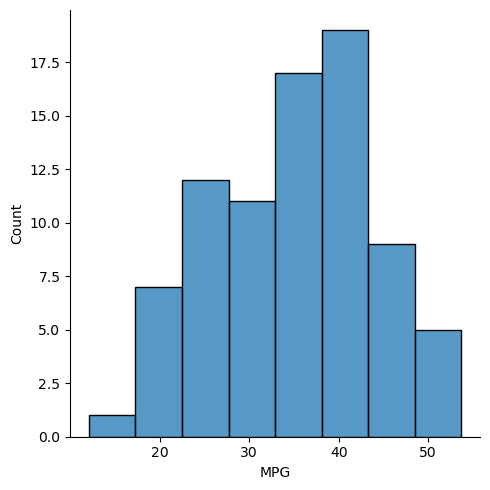

In [128]:
sns.displot(df['MPG'])

<Axes: ylabel='MPG'>

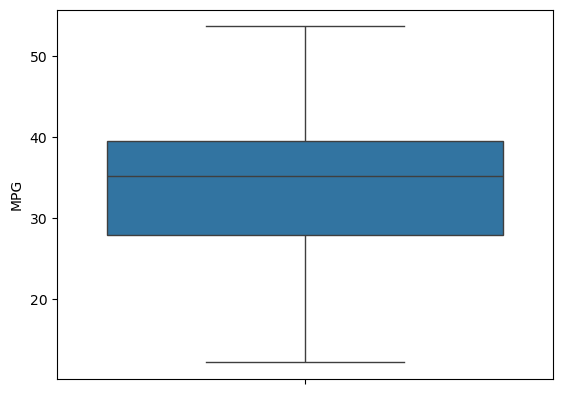

In [130]:
sns.boxplot(df['MPG'])

<Axes: ylabel='MPG'>

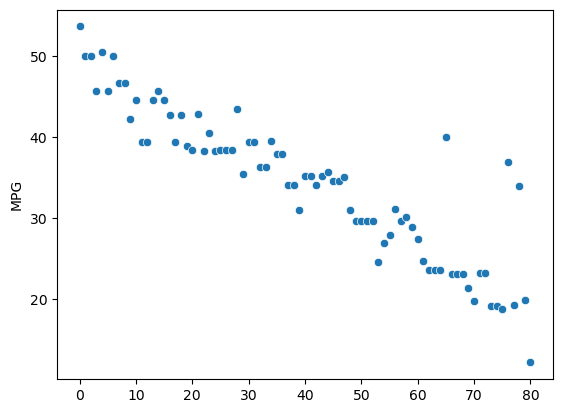

In [132]:
sns.scatterplot(df['MPG'])

<Axes: ylabel='MPG'>

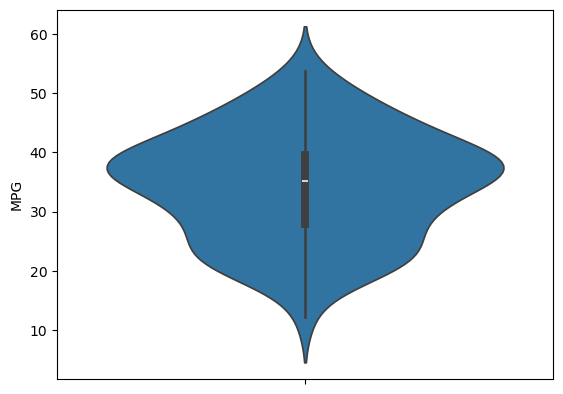

In [134]:
sns.violinplot(df['MPG'])

<Axes: ylabel='HP'>

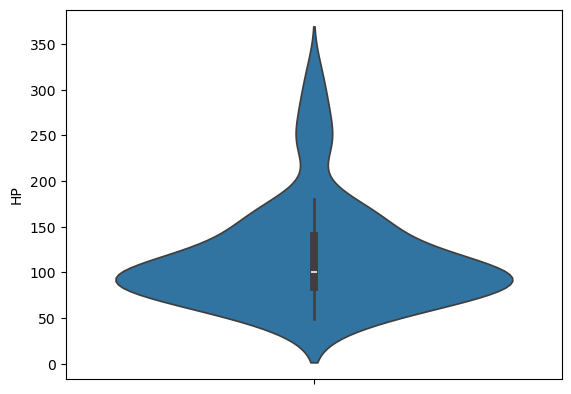

In [136]:
sns.violinplot(df['HP'])

<Axes: ylabel='VOL'>

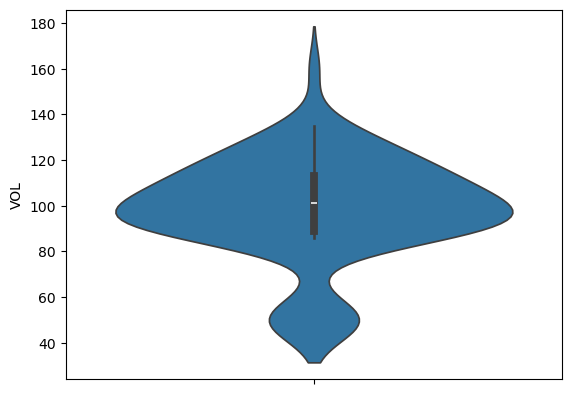

In [138]:
sns.violinplot(df['VOL'])

<Axes: ylabel='SP'>

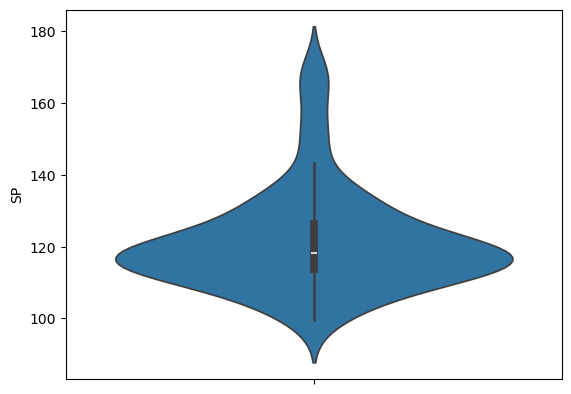

In [140]:
sns.violinplot(df['SP'])

<Axes: ylabel='WT'>

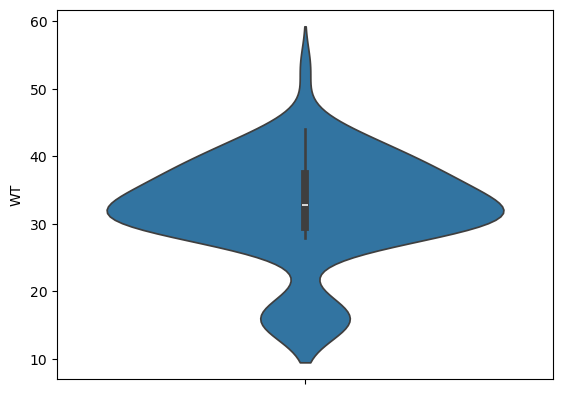

In [142]:
sns.violinplot(df['WT'])

<Axes: ylabel='HP'>

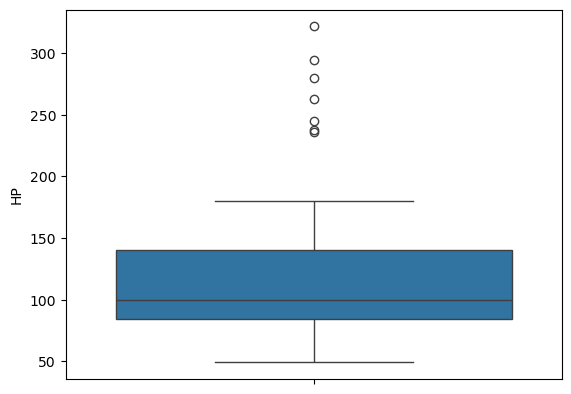

In [144]:
sns.boxplot(df['HP'])

<Axes: ylabel='WT'>

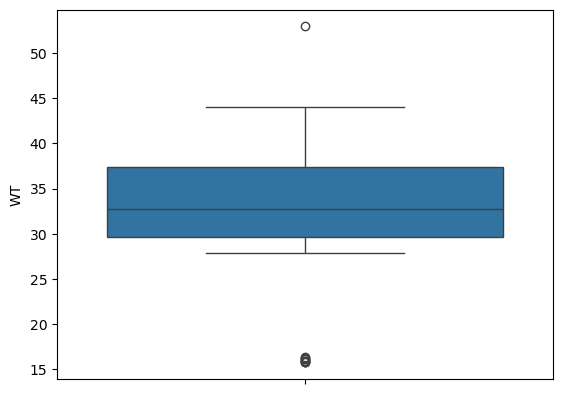

In [146]:
sns.boxplot(df['WT'])

<Axes: ylabel='SP'>

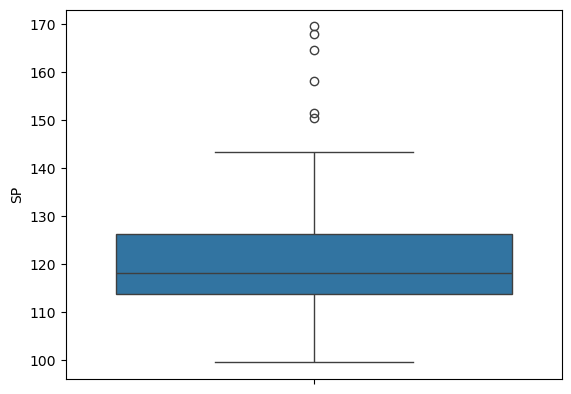

In [148]:
sns.boxplot(df['SP'])

<Axes: ylabel='VOL'>

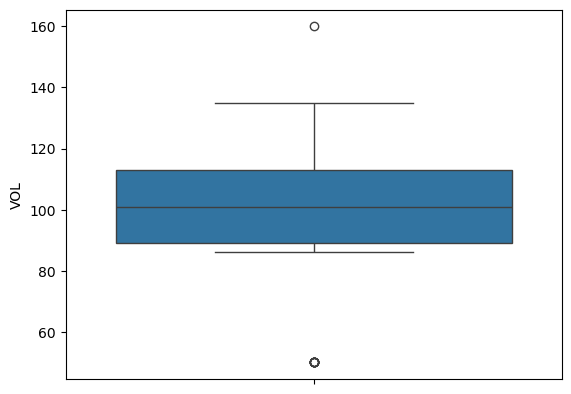

In [150]:
sns.boxplot(df['VOL'])

<Axes: xlabel='VOL', ylabel='Density'>

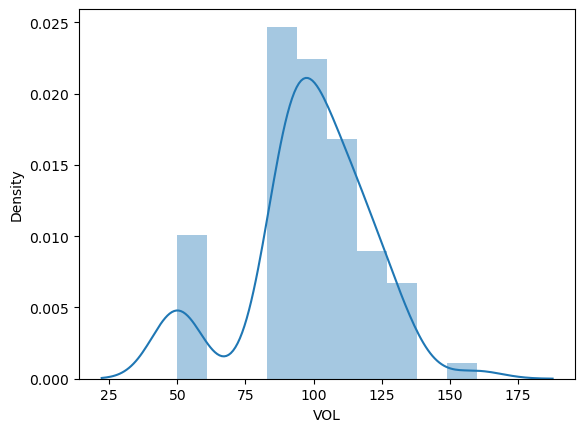

In [152]:
sns.distplot(df['VOL'])

<Axes: xlabel='SP', ylabel='Density'>

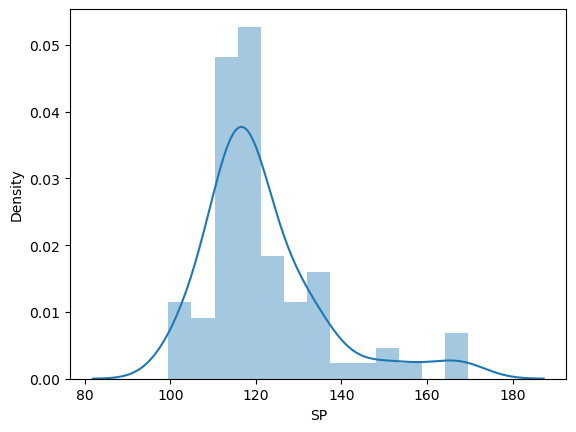

In [154]:
sns.distplot(df['SP'])

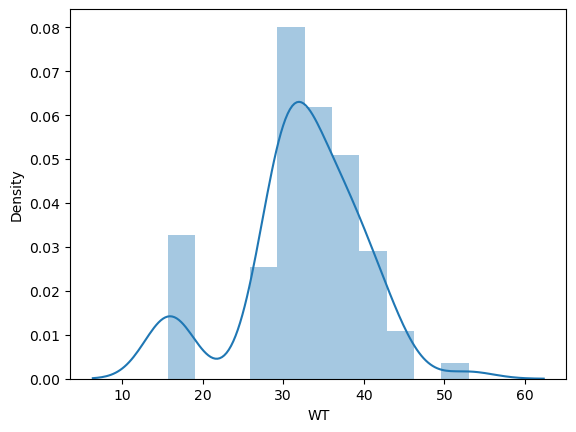

In [156]:
sns.distplot(df['WT'])
plt.show()

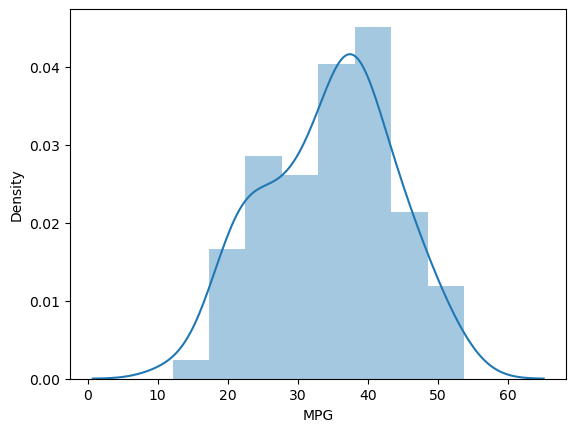

In [158]:
sns.distplot(df['MPG'])
plt.show()

<Axes: ylabel='HP'>

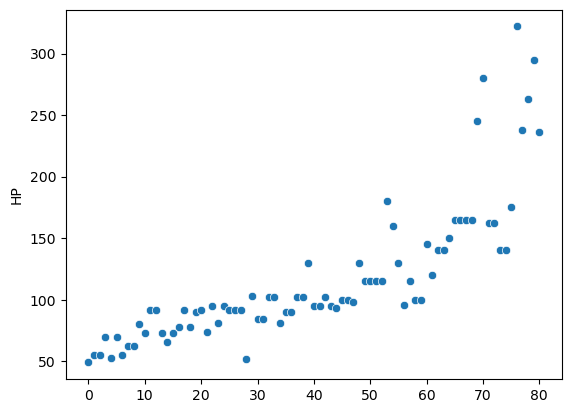

In [160]:
sns.scatterplot(df['HP'])

<Axes: ylabel='SP'>

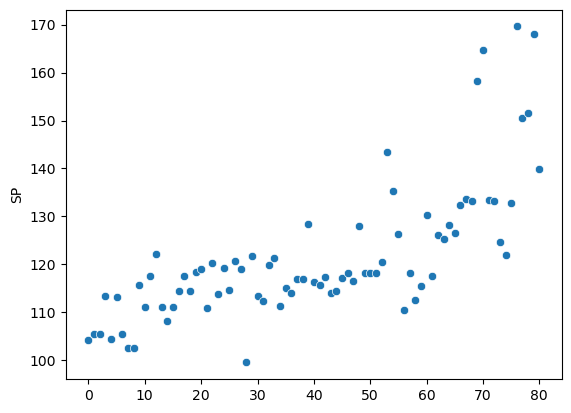

In [162]:
sns.scatterplot(df['SP'])

<Axes: ylabel='WT'>

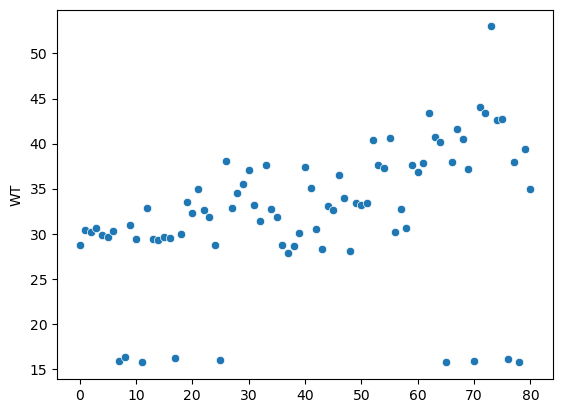

In [164]:
sns.scatterplot(df['WT'])

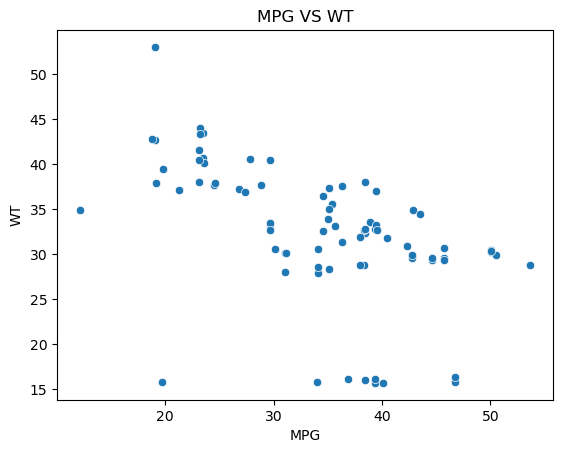

In [177]:
#HOMEWORK&DAY-23
sns.scatterplot(data=df,x='MPG',y='WT')
plt.xlabel('MPG')
plt.ylabel('WT')
plt.title("MPG VS WT")
plt.show()

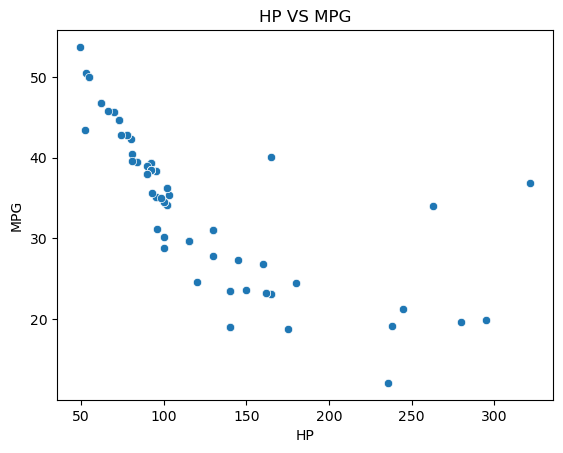

In [183]:
sns.scatterplot(data=df,x='HP',y='MPG')
plt.xlabel('HP')
plt.ylabel('MPG')
plt.title("HP VS MPG")
plt.show()

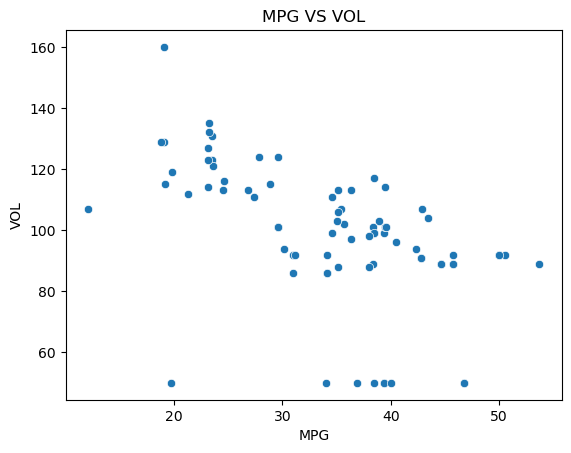

In [187]:
sns.scatterplot(data=df,x='MPG',y='VOL')
plt.xlabel('MPG')
plt.ylabel('VOL')
plt.title("MPG VS VOL")
plt.show()

In [205]:
df.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


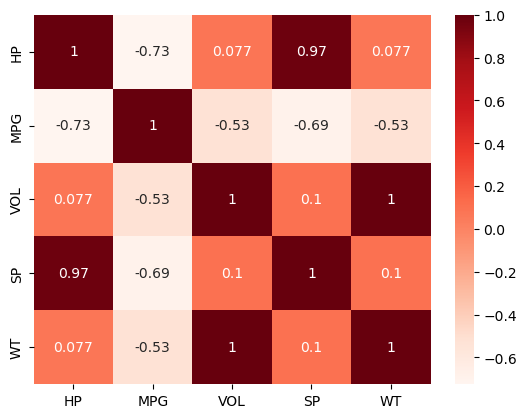

In [223]:
sns.heatmap(df.corr(),cmap='Reds',annot=True)
plt.show()

## heatmaps gives detail about correlation coeffcients
##Multicorrelation is used to 